# Car Selling Price Prediction


The dataset contains various attributes of cars, which will be used to predict their prices. There are total of 13 given columns as follows:

        1. name             : name of the car model
        2. year             : built year
        3. selling_price    : current selling price of the car
        4. km_driven        : total distance driven (in km)
        5. fuel             : fuel type used
        6. seller_type      : type of seller
        7. transmission     : transmission type (manual or automatic)
        8. owner            : the ownerership order (ith-hand)
        9. mileage          : the distance it can travel using a unit of fuel
        10. engine          : the size of engine
        11. max_power       : car's maximum power (rate of completing work in a timeframe)
        12. torque          : car's torque (capacity to do work)
        13. seats           : the number of seats avaialable

In this notebook, a selling_price prediction model will be created using other atrributes as features.

For the web-based app of this model, please visit https://st124323.ml2023.cs.ait.ac.th/ \
and for the repository https://github.com/thassung/AIT_ml2023_a3



### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
import mlflow
import pickle

## Importing Data

In [2]:
df = pd.read_csv('./data/Cars - Cars.csv')

In [3]:
# visualize the head and tail of dataframe
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
# dropping torque column
df.drop(['torque'], axis=1, inplace=True)

In [5]:
df.shape

(8128, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [7]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Because we are predicting *selling_price* which is a continuous label, we will try to implement a regressional model but there are only 4 applicable features so far.
We will inspect more on those string-type values to see the possiblity to encode them.

In [8]:
df.iloc[:,4:8].head()

,fuel,seller_type,transmission,owner
0,Diesel,Individual,Manual,First Owner
1,Diesel,Individual,Manual,Second Owner
2,Petrol,Individual,Manual,Third Owner
3,Diesel,Individual,Manual,First Owner
4,Petrol,Individual,Manual,First Owner


In [9]:
# counting the number of unique values of each columns above.

for col in df.iloc[:,4:8].columns:
    a = len(df[col].unique())
    print(f'The number of unique values of {col}: {a}')
    if a < 10:
        print(f'    Unique values of {col}: {df[col].unique()}')


The number of unique values of fuel: 4
    Unique values of fuel: ['Diesel' 'Petrol' 'LPG' 'CNG']
The number of unique values of seller_type: 3
    Unique values of seller_type: ['Individual' 'Dealer' 'Trustmark Dealer']
The number of unique values of transmission: 2
    Unique values of transmission: ['Manual' 'Automatic']
The number of unique values of owner: 5
    Unique values of owner: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [10]:
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

*mileage*, *engine*, *max_power*, and *torque* can be converted to number if their units are the same and, therfore, neglected.

The *mileage* of natural gas-powered cars use different system from petrol-powered cars, so we will exclude natural gas-powered cars from the dataset. In addition, natural gas-powered cars have very few samples (95 cars).

In [11]:
df.drop(df[df['fuel'] == 'CNG'].index, inplace=True)
df.drop(df[df['fuel'] == 'LPG'].index, inplace=True)

In [12]:
# observing units in each columns
# considering if we have to convert some units or not

print(f'Unique ending of "mileage": {df["mileage"].str[-5:].unique()}')
print(f'Unique ending of "engine": {df["engine"].str[-3:].unique()}')
print(f'Unique ending of "max_power": {df["max_power"].str[-4:].unique()}')


Unique ending of "mileage": [' kmpl' nan]
Unique ending of "engine": [' CC' nan]
Unique ending of "max_power": [' bhp' nan '0']


In [13]:
# no unit conversion is needed
# stripping the unit and change those columns to proper numeric format

df['mileage'] = df['mileage'].str.strip(' kmpl')
df['engine'] = df['engine'].str.strip(' CC')
df['max_power'] = df['max_power'].str.strip(' bhp')

df['mileage'] = df['mileage'].astype(float)
df['engine'] = df['engine'].astype(float)
df['max_power'] = df['max_power'].astype(float)

In [14]:
# Extract brand from car's name and replace name column

df['name'] = list(df['name'].str.split(' ', n=1).str.get(0))
df.rename(columns={'name':'brand'}, inplace=True)

In [15]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


### Feature Encoding

In [16]:
mp = dict()
owner_mapping = {'Test Drive Car': 5,
                 'First Owner': 1,
                 'Second Owner': 2,
                 'Third Owner': 3,
                 'Fourth & Above Owner': 4}
mp['owner_mapping'] = owner_mapping
df.replace({'owner': owner_mapping}, inplace=True)

In [17]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int64  
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.9+ KB


In [19]:
# Import another library
from sklearn.preprocessing import LabelEncoder

# Encode 'fuel' and 'transmission' and print the encoding matrices

le_fuel = LabelEncoder()
le_fuel.fit(df['fuel'])
encoded, mapping = pd.Series(list(le_fuel.classes_)).factorize()
mp['fuel_mapping'] = mapping
print(pd.DataFrame({'': mapping, 'encoded value': encoded}).set_index(''))
df['fuel'] = le_fuel.transform(df['fuel'])

le_transmission = LabelEncoder()
le_transmission.fit(df['transmission'])
encoded, mapping = pd.Series(list(le_transmission.classes_)).factorize()
mp['transmission_mapping'] = mapping
print(pd.DataFrame({'': mapping, 'encoded value': encoded}).set_index(''))
df['transmission'] = le_transmission.transform(df['transmission'])

        encoded value
                     
Diesel              0
Petrol              1
           encoded value
                        
Automatic              0
Manual                 1


In [20]:
df = pd.get_dummies(df, columns=['seller_type'], drop_first=True, dtype=int)

*seller_type* has 2 dummies columns. 
- 1 in *seller_type_Individual* -> Individual
- 1 in *seller_type_Trusmark Dealer* -> Trustmark Dealer
- 0 in **both** columns -> Dealer

In [21]:
df.head()

,brand,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0,1,0
1,Skoda,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0,1,0
2,Honda,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0,1,0
3,Hyundai,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0,1,0
4,Maruti,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0,1,0


## Exploratory Data Analysis

<Axes: xlabel='owner', ylabel='selling_price'>

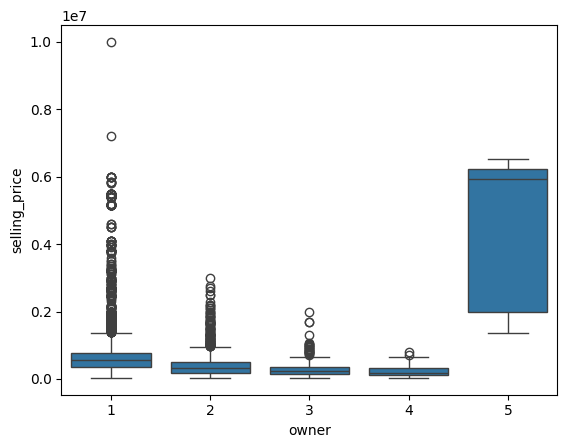

In [22]:
# Observe 'owner' effect on selling_price
sns.boxplot(data=df, x='owner', y='selling_price')

In [23]:
# The test drive car selling_price is extremely expensive. We will exclude them.

df = df[df['owner'] != 5]

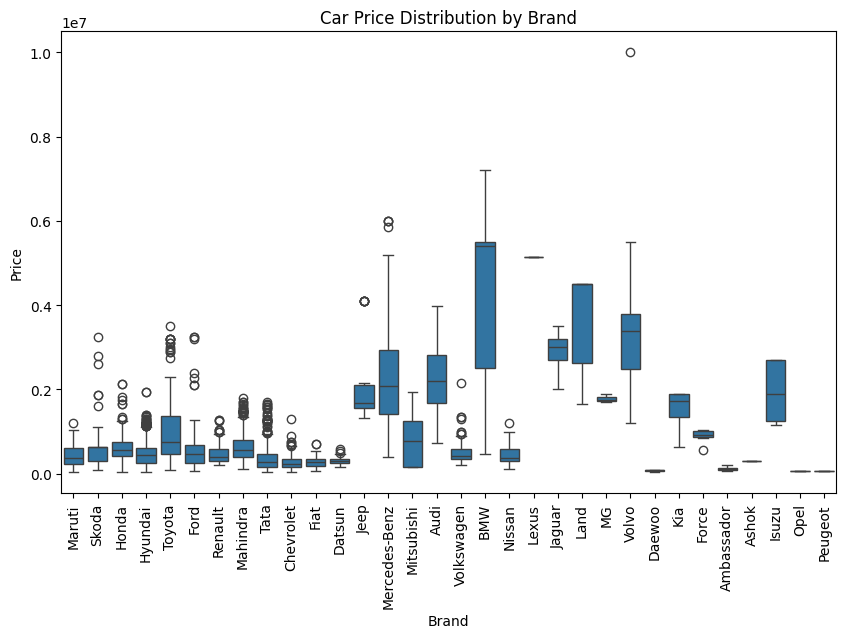

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# plotting boxplot for car selling price by brand

plt.figure(figsize=(10, 6))
sns.boxplot(x='brand', y='selling_price', data=df)
plt.title('Car Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

Cars from each brand has different selling price range. The brand origin (continent of origin) shows that European cars generally have higher price than Asian and American cars (inspected leter in Feature Engineering section). But, the third boxplot shows that, among cars from the same origin, there is still some difference in pricing between brand.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   brand                         8028 non-null   object 
 1   year                          8028 non-null   int64  
 2   selling_price                 8028 non-null   int64  
 3   km_driven                     8028 non-null   int64  
 4   fuel                          8028 non-null   int32  
 5   transmission                  8028 non-null   int32  
 6   owner                         8028 non-null   int64  
 7   mileage                       7814 non-null   float64
 8   engine                        7814 non-null   float64
 9   max_power                     7820 non-null   float64
 10  seats                         7814 non-null   float64
 11  seller_type_Individual        8028 non-null   int32  
 12  seller_type_Trustmark Dealer  8028 non-null   int32  
dtypes: float

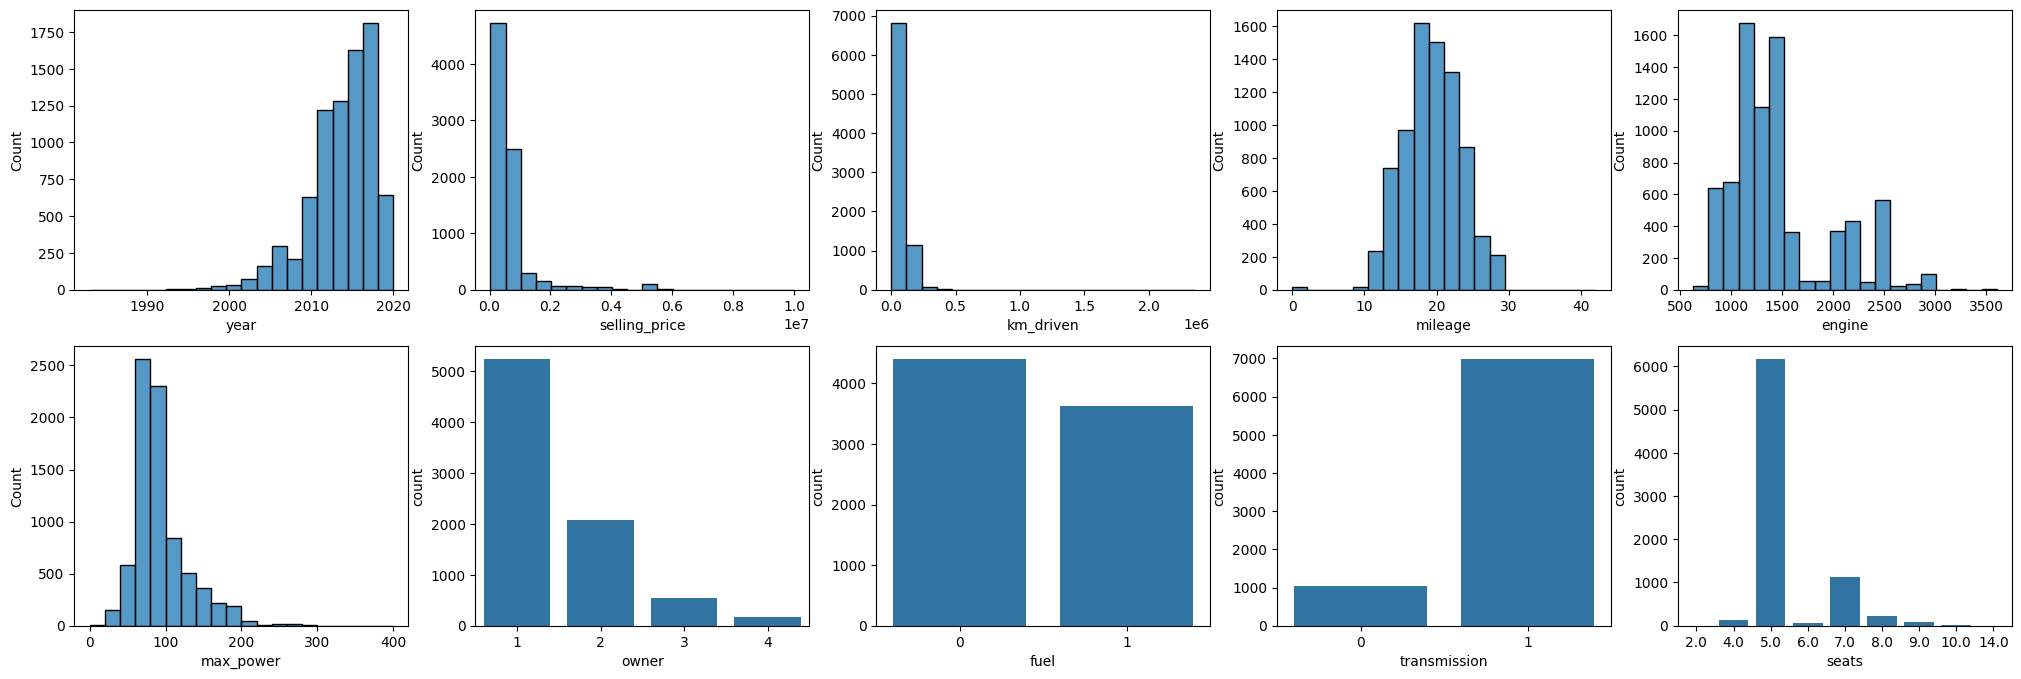

In [26]:
cols = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 
        'owner', 'fuel', 'transmission', 'seats']
fig, axi = plt.subplots(2, 5, figsize=(25,8))

for i,col in enumerate(cols):
    if i<6:
        sns.histplot(data=df, x=col, bins=20, ax=axi[i//5, i%5])
    else:
        sns.countplot(data=df, x=col, ax=axi[i//5, i%5])
          
plt.show()

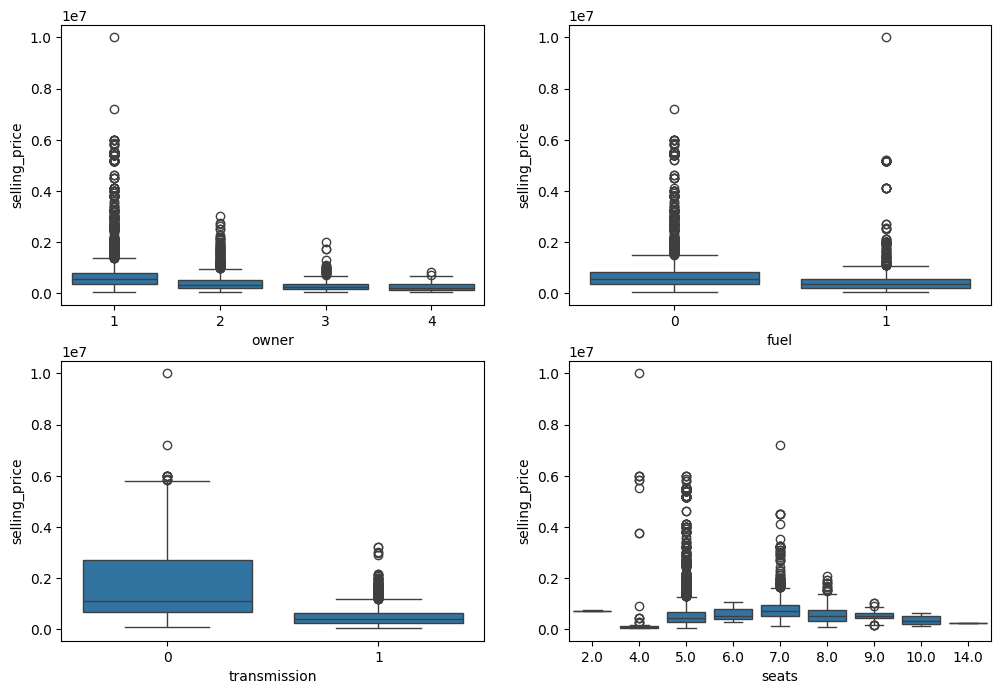

In [27]:
cols = ['owner', 'fuel', 'transmission', 'seats']
fig, axi = plt.subplots(2, 2, figsize=(12,8))

for i,col in enumerate(cols):
    sns.boxplot(data=df, x=col, y='selling_price', ax=axi[i//2, i%2])
          
plt.show()

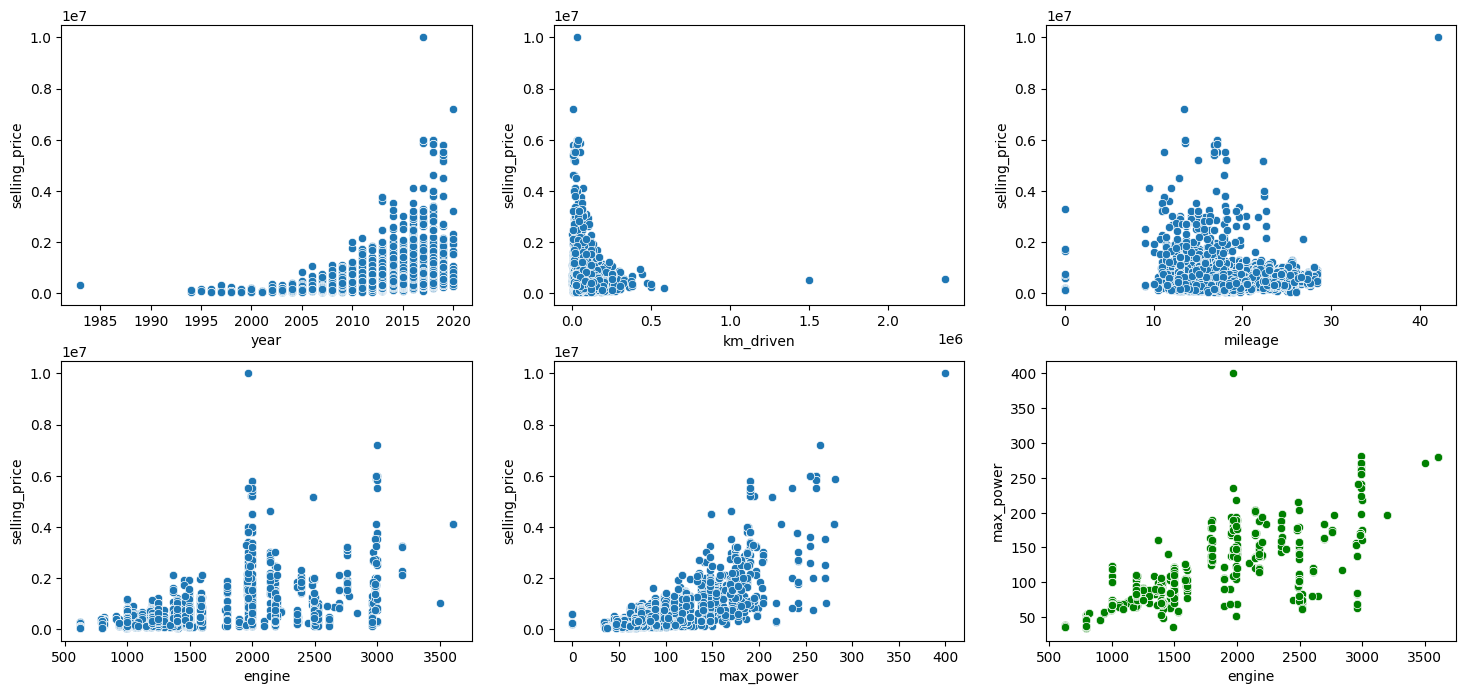

In [28]:
cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power']
fig, axi = plt.subplots(2, 3, figsize=(18,8))

for i,col in enumerate(cols):
    sns.scatterplot(data=df, x=col, y='selling_price', ax=axi[i//3,i%3])
sns.scatterplot(data=df, x='engine', y='max_power', ax=axi[1, 2], color='green')

plt.show()

It seems that 'mileage' will be reaaly bad for 'selling_price' prediction

On the other hand, 'engine' and 'max_power' seems to be correlated. They might be able to predict and fill each other values if it is unspecified or None. (spoiler alert: it provides no significant improvement on the model performance)

### Correlation Matrix

<Axes: >

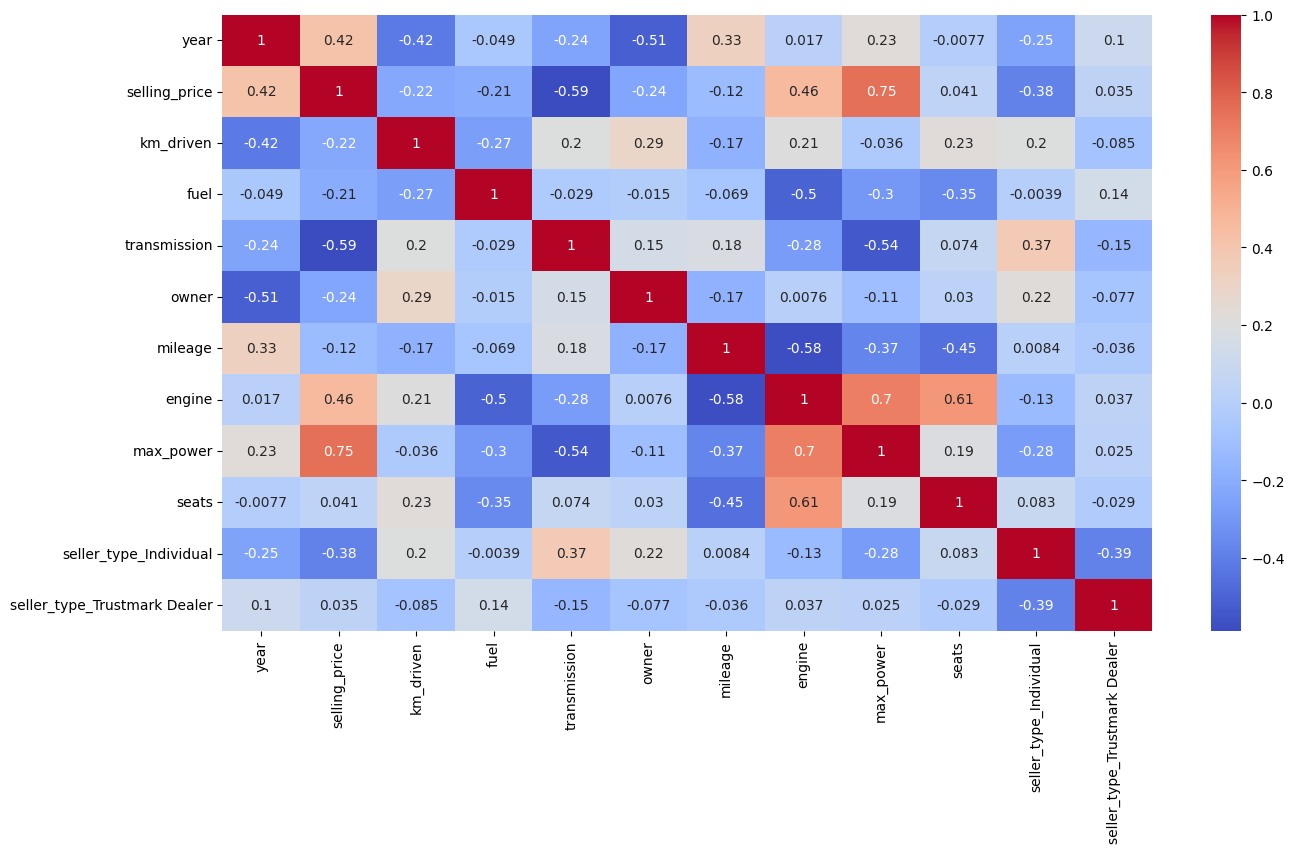

In [29]:
plt.figure(figsize = (15,8))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap="coolwarm")

### Predictive Power Score Matrix

<Axes: xlabel='x', ylabel='y'>

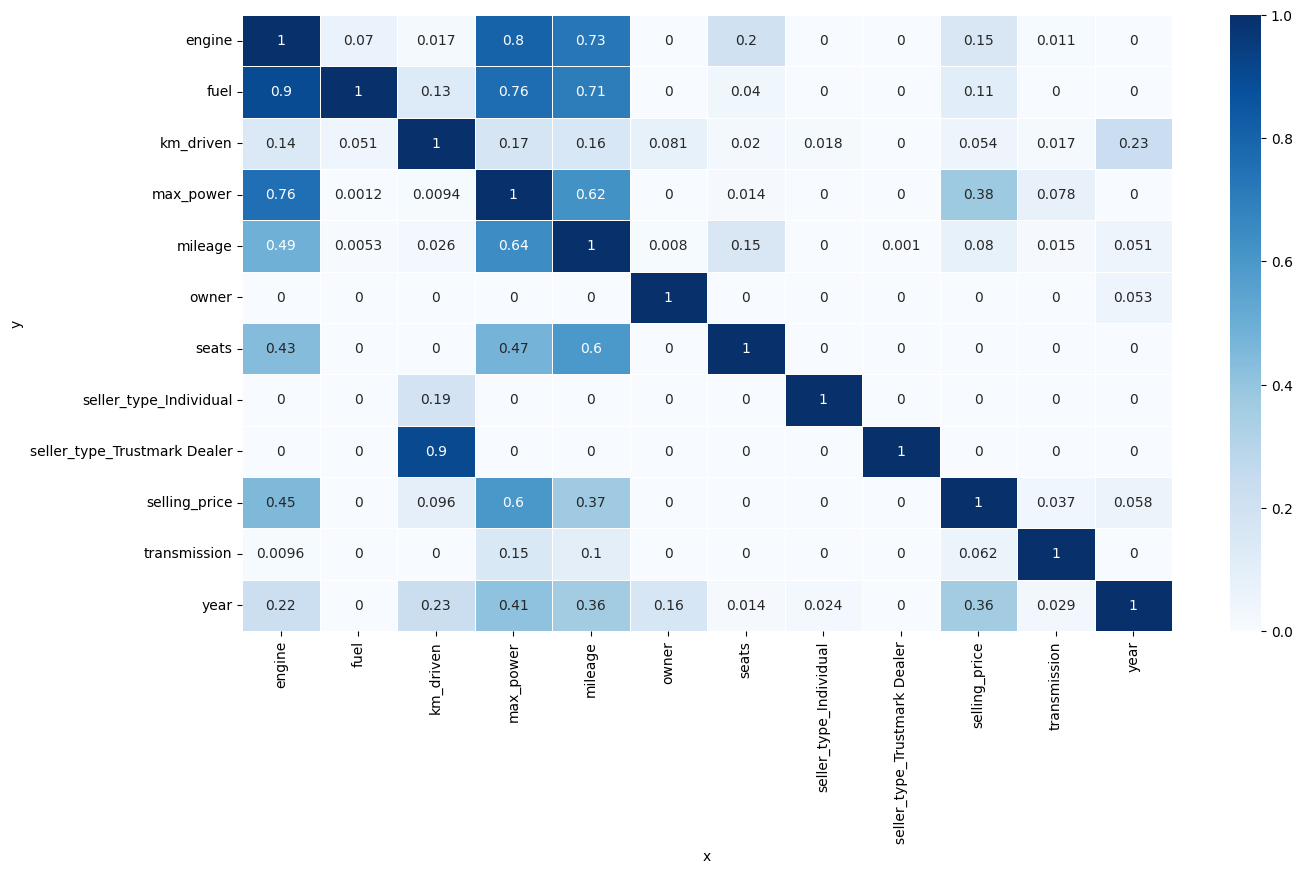

In [30]:
import ppscore as pps


matrix_df = pps.matrix(df.select_dtypes(exclude='object'))[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## Feature Selection

In [31]:
df.head()

,brand,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0,1,0
1,Skoda,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0,1,0
2,Honda,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0,1,0
3,Hyundai,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0,1,0
4,Maruti,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0,1,0


In [32]:
# From correlation and ppscore map, we will drop several columns that potentially complicate the model rather than improving performances.

df.drop(['fuel','owner','mileage', 'km_driven', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'seats'], axis=1, inplace=True)

In [33]:
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         8028 non-null   object 
 1   year          8028 non-null   int64  
 2   transmission  8028 non-null   int32  
 3   engine        7814 non-null   float64
 4   max_power     7820 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 345.0+ KB


## Preprocessing

### Find missing values

In [35]:
# Check Null values

X.isna().sum()

brand             0
year              0
transmission      0
engine          214
max_power       208
dtype: int64

In [36]:
y.isna().sum()

# no null in selling_price label

0

### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Separate labels into 4 classes

In [38]:
# separate y_train and y_test into 4 classes for further multinomial logistic regression

y_train, cut_bins = pd.cut(y_train, 4, labels=False, retbins=True)

In [39]:
y_train.value_counts()

selling_price
0    6090
1     202
2      94
3      36
Name: count, dtype: int64

In [40]:
cut_bins

array([  22828.999, 1822499.25 , 3614999.5  , 5407499.75 , 7200000.   ])

In [41]:
cut_bins[0], cut_bins[4] = -np.inf, np.inf

In [42]:
cut_bins

array([      -inf, 1822499.25, 3614999.5 , 5407499.75,        inf])

In [43]:
y_test = pd.cut(y_test, cut_bins, labels=False)

In [44]:
y_test.value_counts()

selling_price
0    1504
1      62
2      30
3      10
Name: count, dtype: int64

In [45]:
pd.DataFrame(y_test).isna().sum()

selling_price    0
dtype: int64

In [46]:
y = pd.cut(y, cut_bins, labels=False)

In [47]:
pd.DataFrame(y).isna().sum()

selling_price    0
dtype: int64

### Fill missing value

In [48]:
X

,brand,year,transmission,engine,max_power
0,Maruti,2014,1,1248.0,74.00
1,Skoda,2014,1,1498.0,103.52
2,Honda,2006,1,1497.0,78.00
3,Hyundai,2010,1,1396.0,90.00
4,Maruti,2007,1,1298.0,88.20
...,...,...,...,...,...
8123,Hyundai,2013,1,1197.0,82.85
8124,Hyundai,2007,1,1493.0,110.00
8125,Maruti,2009,1,1248.0,73.90
8126,Tata,2013,1,1396.0,70.00


In [49]:
mp

{'owner_mapping': {'Test Drive Car': 5,
  'First Owner': 1,
  'Second Owner': 2,
  'Third Owner': 3,
  'Fourth & Above Owner': 4},
 'fuel_mapping': Index(['Diesel', 'Petrol'], dtype='object'),
 'transmission_mapping': Index(['Automatic', 'Manual'], dtype='object')}

In [50]:
# Fill missing 'engine' value

filling = dict()
filling['engine'] = X_train['engine'].median() 

In [51]:
X_train.isna().sum()

brand             0
year              0
transmission      0
engine          171
max_power       165
dtype: int64

In [52]:
X_train.shape

(6422, 5)

In [53]:
filling

{'engine': 1248.0}

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6422 entries, 2982 to 7366
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         6422 non-null   object 
 1   year          6422 non-null   int64  
 2   transmission  6422 non-null   int32  
 3   engine        6251 non-null   float64
 4   max_power     6257 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 275.9+ KB


In [55]:
# Create other predictors filling matrices

for col in ['year', 'max_power']:
    filling[col] = X_train[col].median() 
for col in ['transmission']:
    filling[col] = X_train[col].mode()[0]

In [56]:
filling

{'engine': 1248.0, 'year': 2015.0, 'max_power': 82.85, 'transmission': 1}

In [57]:
# apply filling to X_train
for col in list(filling.keys()):
    X_train[col].fillna(filling[col], inplace=True)

In [58]:
# apply filling to X_test
for col in list(filling.keys()):
    X_test[col].fillna(filling[col], inplace=True)

In [59]:
# all NaN is filled
X_train

,brand,year,transmission,engine,max_power
2982,Renault,2016,1,799.0,53.30
2430,Maruti,2013,1,796.0,47.30
6294,Hyundai,2009,1,1248.0,82.85
6255,Tata,2018,1,2179.0,153.86
4253,Mitsubishi,1999,1,1998.0,68.00
...,...,...,...,...,...
5293,Hyundai,2013,1,1197.0,78.90
5461,Maruti,2016,1,998.0,67.04
865,Maruti,2015,1,1248.0,88.76
7701,Lexus,2019,0,2487.0,214.56


In [60]:
X_train.isna().sum()

brand           0
year            0
transmission    0
engine          0
max_power       0
dtype: int64

## Check Outliers

In [61]:
def outlier_count(col, data = X_train):
    
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [62]:
for col in X_train.select_dtypes(exclude='object').columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------transmission---------------

Number of outliers: 849
Percent of data that is outlier: 13.22%

---------------engine---------------

Number of outliers: 960
Percent of data that is outlier: 14.95%

---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%


In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6422 entries, 2982 to 7366
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         6422 non-null   object 
 1   year          6422 non-null   int64  
 2   transmission  6422 non-null   int32  
 3   engine        6422 non-null   float64
 4   max_power     6422 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 275.9+ KB


## Scaling

In [64]:
# The four features to be scaled
X_train[['year','engine', 'max_power']]

,year,engine,max_power
2982,2016,799.0,53.30
2430,2013,796.0,47.30
6294,2009,1248.0,82.85
6255,2018,2179.0,153.86
4253,1999,1998.0,68.00
...,...,...,...
5293,2013,1197.0,78.90
5461,2016,998.0,67.04
865,2015,1248.0,88.76
7701,2019,2487.0,214.56


In [65]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
to_be_scaled_cols = ['year', 'engine', 'max_power']

scaler = StandardScaler()
X_train[to_be_scaled_cols] = scaler.fit_transform(X_train[to_be_scaled_cols])

In [66]:
# save the scaler for later uses

import pickle
pickle.dump(scaler, open('./model/scaler.pkl','wb'))

In [67]:
X_train

,brand,year,transmission,engine,max_power
2982,Renault,0.539209,1,-1.316416,-1.088215
2430,Maruti,-0.202184,1,-1.322408,-1.258879
6294,Hyundai,-1.190708,1,-0.419696,-0.247691
6255,Tata,1.033471,1,1.439650,1.772125
4253,Mitsubishi,-3.662018,1,1.078166,-0.670086
...,...,...,...,...,...
5293,Hyundai,-0.202184,1,-0.521551,-0.360046
5461,Maruti,0.539209,1,-0.918983,-0.697393
865,Maruti,0.292078,1,-0.419696,-0.079587
7701,Lexus,1.280602,0,2.054772,3.498682


In [68]:
# one-hot encode the brand column
brand_list = list(X['brand'].values)

brand_dm = pd.get_dummies(X['brand'], columns=['brand'], dtype=int, prefix='b')
brand_dm = brand_dm.columns

col_order = ['year','transmission','engine','max_power']
col_order.extend(sorted(brand_dm))

X_train = pd.get_dummies(X_train, columns=['brand'], dtype=int, prefix='b')

missing_cols = set(brand_dm) - set(X_train.columns)
for col in missing_cols:
    X_train[col] = 0

X_train = X_train[col_order]

In [69]:
col_order

['year',
 'transmission',
 'engine',
 'max_power',
 'b_Ambassador',
 'b_Ashok',
 'b_Audi',
 'b_BMW',
 'b_Chevrolet',
 'b_Daewoo',
 'b_Datsun',
 'b_Fiat',
 'b_Force',
 'b_Ford',
 'b_Honda',
 'b_Hyundai',
 'b_Isuzu',
 'b_Jaguar',
 'b_Jeep',
 'b_Kia',
 'b_Land',
 'b_Lexus',
 'b_MG',
 'b_Mahindra',
 'b_Maruti',
 'b_Mercedes-Benz',
 'b_Mitsubishi',
 'b_Nissan',
 'b_Opel',
 'b_Peugeot',
 'b_Renault',
 'b_Skoda',
 'b_Tata',
 'b_Toyota',
 'b_Volkswagen',
 'b_Volvo']

In [70]:
def fill_scale_encode(df, brand_dm, scaler, col_order, to_be_scaled_cols):                     # For filling NaN and scale value in features df (X)

    df[to_be_scaled_cols]  = scaler.transform(df[to_be_scaled_cols])

    df = pd.get_dummies(df, columns=['brand'], dtype=int, prefix='b')
    missing_cols = set(brand_dm) - set(df.columns)
    for col in missing_cols:
        df[col] = 0
    
    return df[col_order]

In [71]:
X_test = fill_scale_encode(X_test, brand_dm, scaler, col_order, to_be_scaled_cols)

In [72]:
# Check shape and NaN values in test and train set

print(f"Shape of X_train: {X_train.shape} —————————— null value: {X_train.isna().sum().sum()}")
print(f"Shape of X_test: {X_test.shape} —————————— null value: {X_test.isna().sum().sum()}")
print(f"Shape of y_train: {y_train.shape} —————————— null value: {y_train.isna().sum().sum()}")
print(f"Shape of y_test: {y_test.shape} —————————— null value: {y_test.isna().sum().sum()}")

Shape of X_train: (6422, 36) —————————— null value: 0
Shape of X_test: (1606, 36) —————————— null value: 0
Shape of y_train: (6422,) —————————— null value: 0
Shape of y_test: (1606,) —————————— null value: 0


## Modeling

In [73]:
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)

intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [74]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [75]:
# make sure our y is in the shape of (m, k)
# we will convert our output vector in 
# matrix where no. of columns is equal to the no. of classes. 
# The values in the matrix will be 0 or 1. For instance the rows 
# where we have output 2 the column 2 will contain 1 and the rest are all 0.
# in simple words, y will be of shape (m, k)
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

In [76]:
y_train.shape

(6422,)

In [77]:
# # visualize class clusters
# plt.figure(figsize=(6,6))
# plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
# plt.show()

In [78]:
class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=5000, regularization = False):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.regularization = regularization
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        if not self.regularization:
            penalty = 0
        else:
            penalty = self.regularization.derivation(self.W)
        grad = self.softmax_grad(X, error) + penalty
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    def check_shape_mismatch(self, ytrue, yhat):
        if yhat.shape != ytrue.shape:
            print('The arguments shape are mismatched')
            return None

    def class_of_interest(self, c):
        if c is None: #class of interest
            c_list = range(self.k)
        elif isinstance(c, int):
            c_list = [c]
        elif isinstance(c, list):
            c_list = c
        else:
            print('invalid class of interest')
            return
        return c_list

    def accuracy(self, ytrue, yhat):
        self.check_shape_mismatch(ytrue, yhat)
        n = len(yhat)
        m = np.sum(yhat == ytrue)
        return m/n
    
    def precision(self, ytrue, yhat, clss = None):
        self.check_shape_mismatch(ytrue, yhat)
        prec = dict()   
        c_list = self.class_of_interest(clss)
        for c in c_list:
            yhat_c = np.where(yhat == c, 1, 0)
            ytrue_c = np.where(ytrue == c, 1, 0)
            TP = np.sum(np.all([yhat_c==1, ytrue_c==1], axis=0))
            FP = np.sum(np.all([yhat_c==1, ytrue_c==0], axis=0))
            if TP+FP == 0:
                # no positive is predicted
                # 'zero division error'
                prec[c] = 0
            else:
                prec[c] = TP/(TP+FP)
        return prec
    
    def recall(self, ytrue, yhat, clss=None):
        self.check_shape_mismatch(ytrue, yhat)
        rec = dict()   
        c_list = self.class_of_interest(clss)
        for c in c_list:
            yhat_c = np.where(yhat == c, 1, 0)
            ytrue_c = np.where(ytrue == c, 1, 0)
            TP = np.sum(np.all([yhat_c==1, ytrue_c==1], axis=0))
            FN = np.sum(np.all([yhat_c==0, ytrue_c==1], axis=0))
            if TP+FN == 0:
                # no positive in true value
                # 'zero division error'
                rec[c] = 0
            else:
                rec[c] = TP/(TP+FN)
        return rec
    
    def f1_score(self, ytrue, yhat, clss=None):
        f1 = dict()
        c_list = self.class_of_interest(clss)
        prec = self.precision(ytrue, yhat, clss)
        rec = self.recall(ytrue, yhat, clss)
        for c in c_list:
            if prec[c] + rec[c] == 0:
                # 'zero division error'
                f1[c] = 0
            else:
                f1[c] = (2*prec[c]*rec[c]) / (prec[c] + rec[c])
        return f1
    
    def macro_precision(self, ytrue, yhat):
        prec = self.precision(ytrue, yhat)
        mac_prec = sum(prec.values()) / self.k
        return mac_prec
    
    def macro_recall(self, ytrue, yhat):
        rec = self.recall(ytrue, yhat)
        mac_rec = sum(rec.values()) / self.k
        return mac_rec
    
    def macro_f1_score(self, ytrue, yhat):
        f1 = self.f1_score(ytrue, yhat)
        mac_f1 = sum(f1.values()) / self.k
        return mac_f1
    
    def weighted_precision(self, ytrue, yhat):
        prec = np.array([k for k in self.precision(ytrue, yhat).values()])
        w = np.array(self.support(ytrue)) / len(ytrue)
        return prec@w
    
    def weighted_recall(self, ytrue, yhat):
        rec = np.array([k for k in self.recall(ytrue, yhat).values()])
        w = np.array(self.support(ytrue)) / len(ytrue)
        return rec@w
    
    def weighted_f1_score(self, ytrue, yhat):
        f1 = np.array([k for k in self.f1_score(ytrue, yhat).values()])
        w = np.array(self.support(ytrue)) / len(ytrue)
        return f1@w
    
    def support(self, ytrue):
        sup = [None] * self.k
        for c in range(self.k):
            sup[c] = np.sum(ytrue == c)
        return sup
    
    def classification_report(self, ytrue, yhat):
        self.check_shape_mismatch(ytrue, yhat)

        prec = np.array([k for k in self.precision(ytrue, yhat).values()])
        rec = np.array([k for k in self.recall(ytrue, yhat).values()])
        f1 = np.array([k for k in self.f1_score(ytrue, yhat).values()])
        w = np.array(self.support(ytrue)) / len(ytrue)
        part1 = pd.DataFrame({'precision':["{:.4f}".format(k) for k in prec],
                'recall':["{:.4f}".format(k) for k in rec],
                'f1-score':["{:.4f}".format(k) for k in f1],
                'support': self.support(ytrue)})
        part1.set_index([pd.Series([' '*10+'0', ' '*10+'1', ' '*10+'2', ' '*10+'3'])], inplace=True)

        part2 = pd.DataFrame({'accuracy': ['',  '', "{:.4f}".format(self.accuracy(ytrue, yhat)), len(ytrue)],
                              'macro avg': ["{:.4f}".format(np.mean(prec)), "{:.4f}".format(np.mean(rec)), "{:.4f}".format(np.mean(f1)), len(ytrue)],
                              'weighted avg': ["{:.4f}".format(prec@w), "{:.4f}".format(rec@w), "{:.4f}".format(f1@w), len(ytrue)]
                              }, index=None).set_index(pd.Index(['','','',''])).T
        return part1.to_string() + "\n" + part2.to_string()


Loss at iteration 0 1.101168065799391
Loss at iteration 500 0.04683680727756858
Loss at iteration 1000 0.04278303568911338
Loss at iteration 1500 0.049295558891128154
Loss at iteration 2000 0.04292693703309918
Loss at iteration 2500 0.04530824564749684
Loss at iteration 3000 0.03825524381848227
Loss at iteration 3500 0.035629622045432
Loss at iteration 4000 0.03931980513830544


Loss at iteration 4500 0.03464226353485786
time taken: 2.6279759407043457
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1504
           1       0.87      0.85      0.86        62
           2       0.82      0.47      0.60        30
           3       0.35      0.80      0.48        10

    accuracy                           0.98      1606
   macro avg       0.76      0.78      0.73      1606
weighted avg       0.98      0.98      0.98      1606



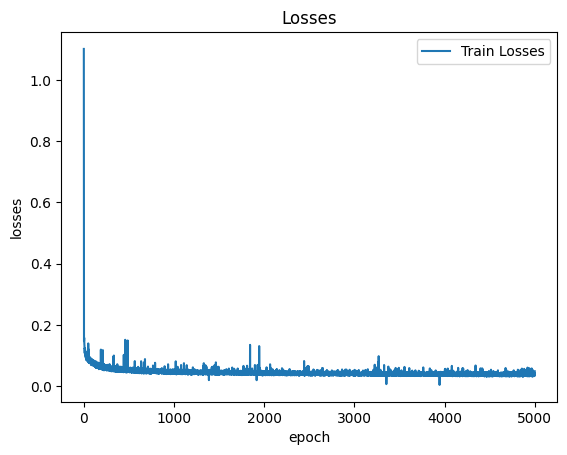

In [79]:
from sklearn.metrics import classification_report

k = len(set(y))
model = LogisticRegression(k, X_train.shape[1], "minibatch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

In [80]:
y_test.shape

(1606,)

In [81]:
yhat.shape

(1606,)

In [82]:
print("=========Classification report=======")
print("Report: \n", model.classification_report(y_test, yhat))

=========Classification report=======
Report: 
             precision  recall f1-score  support
          0    0.9953  0.9960   0.9957     1504
          1    0.8689  0.8548   0.8618       62
          2    0.8235  0.4667   0.5957       30
          3    0.3478  0.8000   0.4848       10
                                          
accuracy                      0.9795  1606
macro avg     0.7589  0.7794  0.7345  1606
weighted avg  0.9832  0.9795  0.9799  1606


## Apply Ridge

In [83]:
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): 
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta

class Ridge(LogisticRegression):
    
    def __init__(self, k, n, method, l, alpha, max_iter = 5000):
        self.regularization = RidgePenalty(l)
        super().__init__(k, n, method, alpha, max_iter, self.regularization)

Loss at iteration 0 0.8977366415770738


Loss at iteration 500 0.051528413631401836
Loss at iteration 1000 0.047776341676595294
Loss at iteration 1500 0.042117989286573766
Loss at iteration 2000 0.04679323114286677
Loss at iteration 2500 0.046036720608160574
Loss at iteration 3000 0.044607069450247706
Loss at iteration 3500 0.04450525676426532
Loss at iteration 4000 0.06639243613341017
Loss at iteration 4500 0.03741045128036148
time taken: 2.7054717540740967
=========Classification report=======
Report: 
             precision  recall f1-score  support
          0    0.9934  0.9960   0.9947     1504
          1    0.8448  0.7903   0.8167       62
          2    0.8235  0.4667   0.5957       30
          3    0.3043  0.7000   0.4242       10
                                          
accuracy                      0.9763  1606
macro avg     0.7415  0.7382  0.7078  1606
weighted avg  0.9802  0.9763  0.9768  1606


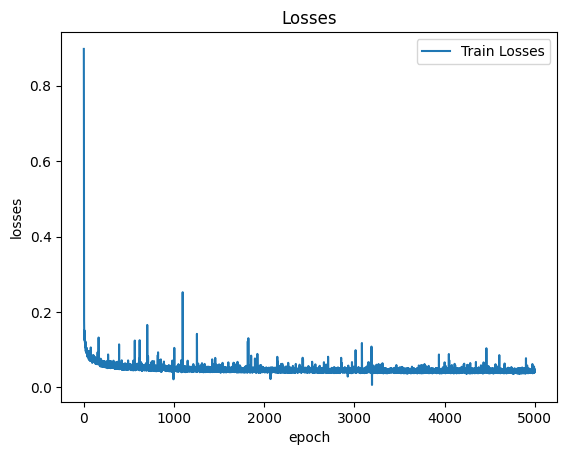

In [84]:
k = len(set(y))
model = Ridge(k, X_train.shape[1], "minibatch", l = 0.1, alpha = 0.001, max_iter = 5000)
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: \n", model.classification_report(y_test, yhat)) # use our version of report function

## Logging the experiment to MLFlow

In [87]:
import mlflow
import os

mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")

os.environ["LOGNAME"] = "ksung"
# mlflow.create_experiment(name="st124323-a3")  #create if you haven't create
mlflow.set_experiment(experiment_name="st124323-a3")

<Experiment: artifact_location='mlflow-artifacts:/786796262248941209', creation_time=1695586379952, experiment_id='786796262248941209', last_update_time=1695586379952, lifecycle_stage='active', name='st124323-a3', tags={}>

In [88]:
class LogisticRegression_MLFlow:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=10000, regularization = False, l = 0):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.regularization = regularization
        self.l = l
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        params = {'class': self.k, 'method': self.method, 'lr': self.alpha, 
                      'l': self.l, 'iter': self.max_iter}

        if self.method == "batch":
            start_time = time.time()
            mlflow.log_params(params=params)
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % (self.max_iter//3) == 0:
                    print(f"Loss at iteration {i}", loss)
                if i % (self.max_iter//50) == 0:
                    mlflow.log_metric(key="loss", value=loss, step=i)
            print(f"Loss at iteration {i}", loss)
            mlflow.log_metric(key="loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            mlflow.log_params(params=params)
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % (self.max_iter//3) == 0:
                    print(f"Loss at iteration {i}", loss)
                if i % (self.max_iter//50) == 0:
                    mlflow.log_metric(key="loss", value=loss, step=i)
            print(f"Loss at iteration {i}", loss)
            mlflow.log_metric(key="loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            mlflow.log_params(params=params)
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % (self.max_iter//3) == 0:
                    print(f"Loss at iteration {i}", loss)
                if i % (self.max_iter//50) == 0:
                    mlflow.log_metric(key="loss", value=loss, step=i)
            print(f"Loss at iteration {i}", loss)
            mlflow.log_metric(key="loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        

        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        if not self.regularization:
            penalty = 0
        else:
            penalty = self.regularization.derivation(self.W)
        grad = self.softmax_grad(X, error) + penalty
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    def check_shape_mismatch(self, ytrue, yhat):
        if yhat.shape != ytrue.shape:
            print('The arguments shape are mismatched')
            return None

    def class_of_interest(self, c):
        if c is None: #class of interest
            c_list = range(self.k)
        elif isinstance(c, int):
            c_list = [c]
        elif isinstance(c, list):
            c_list = c
        else:
            print('invalid class of interest')
            return
        return c_list

    def accuracy(self, ytrue, yhat):
        self.check_shape_mismatch(ytrue, yhat)
        n = len(yhat)
        m = np.sum(yhat == ytrue)
        return m/n
    
    def precision(self, ytrue, yhat, clss = None):
        self.check_shape_mismatch(ytrue, yhat)
        prec = dict()   
        c_list = self.class_of_interest(clss)
        for c in c_list:
            yhat_c = np.where(yhat == c, 1, 0)
            ytrue_c = np.where(ytrue == c, 1, 0)
            TP = np.sum(np.all([yhat_c==1, ytrue_c==1], axis=0))
            FP = np.sum(np.all([yhat_c==1, ytrue_c==0], axis=0))
            if TP+FP == 0:
                # no positive is predicted
                # 'zero division error'
                prec[c] = 0
            else:
                prec[c] = TP/(TP+FP)
        return prec
    
    def recall(self, ytrue, yhat, clss=None):
        self.check_shape_mismatch(ytrue, yhat)
        rec = dict()   
        c_list = self.class_of_interest(clss)
        for c in c_list:
            yhat_c = np.where(yhat == c, 1, 0)
            ytrue_c = np.where(ytrue == c, 1, 0)
            TP = np.sum(np.all([yhat_c==1, ytrue_c==1], axis=0))
            FN = np.sum(np.all([yhat_c==0, ytrue_c==1], axis=0))
            if TP+FN == 0:
                # no positive in true value
                # 'zero division error'
                rec[c] = 0
            else:
                rec[c] = TP/(TP+FN)
        return rec
    
    def f1_score(self, ytrue, yhat, clss=None):
        f1 = dict()
        c_list = self.class_of_interest(clss)
        prec = self.precision(ytrue, yhat, clss)
        rec = self.recall(ytrue, yhat, clss)
        for c in c_list:
            if prec[c] + rec[c] == 0:
                # 'zero division error'
                f1[c] = 0
            else:
                f1[c] = (2*prec[c]*rec[c]) / (prec[c] + rec[c])
        return f1
    
    def macro_precision(self, ytrue, yhat):
        prec = self.precision(ytrue, yhat)
        mac_prec = sum(prec.values()) / self.k
        return mac_prec
    
    def macro_recall(self, ytrue, yhat):
        rec = self.recall(ytrue, yhat)
        mac_rec = sum(rec.values()) / self.k
        return mac_rec
    
    def macro_f1_score(self, ytrue, yhat):
        f1 = self.f1_score(ytrue, yhat)
        mac_f1 = sum(f1.values()) / self.k
        return mac_f1
    
    def weighted_precision(self, ytrue, yhat):
        prec = np.array([k for k in self.precision(ytrue, yhat).values()])
        w = np.array(self.support(ytrue)) / len(ytrue)
        return prec@w
    
    def weighted_recall(self, ytrue, yhat):
        rec = np.array([k for k in self.recall(ytrue, yhat).values()])
        w = np.array(self.support(ytrue)) / len(ytrue)
        return rec@w
    
    def weighted_f1_score(self, ytrue, yhat):
        f1 = np.array([k for k in self.f1_score(ytrue, yhat).values()])
        w = np.array(self.support(ytrue)) / len(ytrue)
        return f1@w
    
    def support(self, ytrue):
        sup = [None] * self.k
        for c in range(self.k):
            sup[c] = np.sum(ytrue == c)
        return sup
    
    def classification_report(self, ytrue, yhat):
        self.check_shape_mismatch(ytrue, yhat)

        prec = np.array([k for k in self.precision(ytrue, yhat).values()])
        rec = np.array([k for k in self.recall(ytrue, yhat).values()])
        f1 = np.array([k for k in self.f1_score(ytrue, yhat).values()])
        w = np.array(self.support(ytrue)) / len(ytrue)
        part1 = pd.DataFrame({'precision':["{:.4f}".format(k) for k in prec],
                'recall':["{:.4f}".format(k) for k in rec],
                'f1-score':["{:.4f}".format(k) for k in f1],
                'support': self.support(ytrue)})
        part1.set_index([pd.Series([' '*10+'0', ' '*10+'1', ' '*10+'2', ' '*10+'3'])], inplace=True)

        part2 = pd.DataFrame({'accuracy': ['',  '', "{:.4f}".format(self.accuracy(ytrue, yhat)), len(ytrue)],
                              'macro avg': ["{:.4f}".format(np.mean(prec)), "{:.4f}".format(np.mean(rec)), "{:.4f}".format(np.mean(f1)), len(ytrue)],
                              'weighted avg': ["{:.4f}".format(prec@w), "{:.4f}".format(rec@w), "{:.4f}".format(f1@w), len(ytrue)]
                              }, index=None).set_index(pd.Index(['','','',''])).T
        return part1.to_string() + "\n" + part2.to_string()


In [89]:
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): 
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta

class Ridge_MLFlow(LogisticRegression_MLFlow):
    
    def __init__(self, k, n, method, l, alpha, max_iter = 5000):
        self.regularization = RidgePenalty(l)
        super().__init__(k, n, method, alpha, max_iter, self.regularization, l)

In [ ]:
params_grid = {'k': [len(set(y))],
               'n': [X_train.shape[1]],
               "method": ["batch", 'minibatch', 'sto'], 
               "alpha": [0.1, 0.01, 0.005], 
               "l": [0, 0.1, 0.01, 1], 
               "max_iter": [10000, 50000]} # 72 combinations

# params_grid = {'k': [len(set(y))],
#                'n': [X_train.shape[1]],
#                "method": ["batch"], 
#                "alpha": [0.005], 
#                "l": [0.01], 
#                "max_iter": [10000]} 

import itertools 

keys, values = zip(*params_grid.items())

for v in itertools.product(*values):
    params = dict(zip(keys, v))
    # params = {'method': 'batch', 'lr': 0.1, 'l': 0.1, 'iter': 5000}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['alpha']}\
                     -lambda-{params['l']}-iter-{params['max_iter']}", nested=True)

    # print("="*5, v, "="*5)
    print("="*5, v[2:], "="*5)

    # #######
    model = Ridge_MLFlow(**params)  
    model.fit(X_train, Y_train_encoded)
    yhat = model.predict(X_test)

    acc = model.accuracy(y_test, yhat)
    prec = model.precision(y_test, yhat)
    rec = model.recall(y_test, yhat)
    f1 = model.f1_score(y_test, yhat)
    mprec = model.macro_precision(y_test, yhat)
    mrec = model.macro_recall(y_test, yhat)
    mf1 = model.macro_f1_score(y_test, yhat)
    wprec = model.weighted_precision(y_test, yhat)
    wrec = model.weighted_recall(y_test, yhat)
    wf1 = model.weighted_f1_score(y_test, yhat)

    mlflow.log_metric(key="test_acc", value=acc)
    mlflow.log_metric(key="test_mprec", value=mprec)
    mlflow.log_metric(key="test_mrec", value=mrec)
    mlflow.log_metric(key="test_mf1", value=mf1)
    mlflow.log_metric(key="test_wprec", value=wprec)
    mlflow.log_metric(key="test_wrec", value=wrec)
    mlflow.log_metric(key="test_wf1", value=wf1)
    for i in range(4):
        mlflow.log_metric(key="test_prec_"+str(i), value=prec[i])
        mlflow.log_metric(key="test_rec_"+str(i), value=rec[i])
        mlflow.log_metric(key="test_f1_"+str(i), value=f1[i])

    print('Logging completed')
    print("Report: \n", model.classification_report(y_test, yhat))

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    # #######

    mlflow.end_run() 

In [91]:
mlflow.end_run() 

# Select the best model from the experiment

### Viewing loss from different learning rate and lambda

![Alt text](image-1.png)
![Alt text](image-2.png)

The learning rate of 0.1 seems to be too high for our input and create a lot of instability in the model. Similarly the higher lambda also creates the model incentive to minimize parameter rather than decreasing the model bias.

However, loss is not the best parameter to choose a model from since it can be a result from overfitting. In this case, we use weighted f1 score instead because of the class imbalance rendering accuracy meaningless. We want consider precision because we want to prevent model from mass guessing the majority class and recall to encourage the prediction of a minority class in the predicted result. Thus, we select the model based on the *weighted f1-score*.

![Alt text](image-3.png)

Plus, the top two performing models have the same parameters except the *num_iter*.

### Classification report of the model

In [85]:
# Reload the selected model and show its performance
# The model is seleected from the maximum weighted f1-score

mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
model = mlflow.sklearn.load_model('models:/st124323-a3-model/staging')
print(model.classification_report(y_test, model.predict(X_test)))

            precision  recall f1-score  support
          0    0.9953  0.9953   0.9953     1504
          1    0.8571  0.8710   0.8640       62
          2    0.9412  0.5333   0.6809       30
          3    0.4545  1.0000   0.6250       10
                                          
accuracy                      0.9819  1606
macro avg     0.8121  0.8499  0.7913  1606
weighted avg  0.9856  0.9819  0.9821  1606


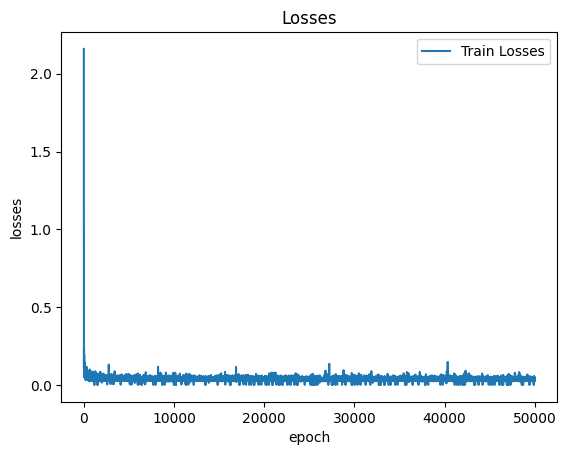

In [86]:
# plot loss vs epoch
model.plot()

<Axes: >

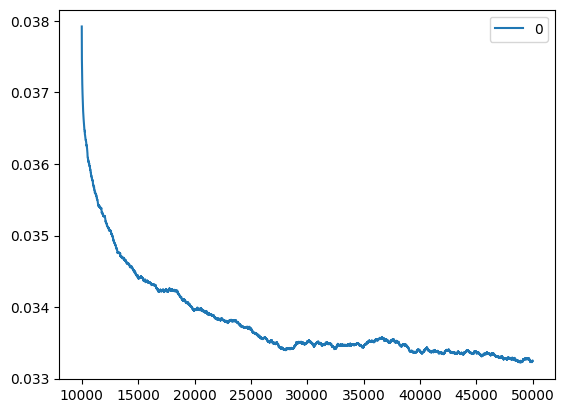

In [87]:
# use rolling to make the graph more interpretable
pd.DataFrame(model.losses).rolling(10000).mean().plot()

# Loss gradually decrease and approache a loss plateau 
# Note that this model is selected not because the minimum loss but the maximum weighted f1-score

Text(0.5, 1.0, 'Confusion Matrix of Test Dataset')

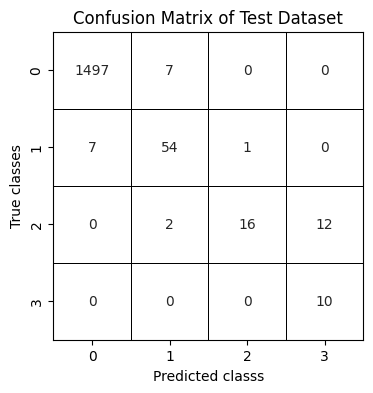

In [107]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, cmap='gray_r', cbar=False, vmin=1000, vmax=1000, linewidths=0.5, linecolor='k', fmt='g')
sns.despine(left=False, right=False, top=False, bottom=False)
plt.xlabel('Predicted classs')
plt.ylabel('True classes')
plt.title('Confusion Matrix of Test Dataset')

# Create test cases for CI/CD

## Create expected outputs of the intermediate function

In [3]:
# ref. '../app/pages/V3.py'

def mock_V3_class_prediction(x_1, x_2, x_3, x_4, x_5):
    
    scaler = pickle.load(open('../app/pages/codeV3/model/scaler.pkl','rb'))
    ## scale engine and max_power
    if x_1 is None:
        x_1 = 0
    if x_2 is None:
        x_2 = 2015.0
    if x_3 is None:
        x_3 = 1
    if x_4 is None:
        x_4 = 1248.0
    if x_5 is None:
        x_5 = 82.85
    # print(x_1,x_2,x_3,x_4,x_5)
    tbs = pd.DataFrame({'year': [x_2], 'engine':[x_4], 'max_power':[x_5]})
    tbs = scaler.transform(tbs)
    x_2, x_4, x_5 = tbs[0][0], tbs[0][1], tbs[0][2]

    ## dummies for brand 
    ## x_1 starts from 1
    ## 0 is Other/Unknown
    # brand_list = ['Ambassador','Ashok','Audi','BMW','Chevrolet','Daewoo','Datsun','Fiat',
    #                 'Force','Ford','Honda','Hyundai','Isuzu','Jaguar','Jeep',
    #                 'Kia','Land','Lexus','MG','Mahindra','Maruti','Mercedes-Benz',
    #                 'Mitsubishi','Nissan','Opel','Peugeot','Renault','Skoda','Tata',
    #                 'Toyota','Volkswagen','Volvo']

    col_order = ['year','transmission','engine','max_power','b_Ambassador','b_Ashok','b_Audi',
                'b_BMW','b_Chevrolet','b_Daewoo','b_Datsun','b_Fiat','b_Force','b_Ford',
                'b_Honda','b_Hyundai','b_Isuzu','b_Jaguar','b_Jeep','b_Kia','b_Land',
                'b_Lexus','b_MG','b_Mahindra','b_Maruti','b_Mercedes-Benz','b_Mitsubishi',
                'b_Nissan','b_Opel','b_Peugeot','b_Renault','b_Skoda','b_Tata',
                'b_Toyota','b_Volkswagen','b_Volvo']
    
    X = pd.DataFrame(0, index=np.array([1]), columns=col_order)
    X.iloc[:,:4] = x_2, x_3, x_4, x_5
    X.iloc[:,x_1+3] = 1
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)
    phat = model.predict(X)
    
    return phat   

In [21]:
print(mock_V3_class_prediction(29, 2023, 0, 1800, 130)) # Toyota, year 2023, Auto, 1800 cc, 130 bhp

[2]


In [22]:
print(mock_V3_class_prediction(4, 2018, 0, 1500, 90)) # BMW, year 2018, Auto, 1500 cc, 90 bhp

[0]


In [23]:
print(mock_V3_class_prediction(None,None,None,None,None))

[0]


In [24]:
print(mock_V3_class_prediction(3,2023,None,None,None))

[1]


In [25]:
print(mock_V3_class_prediction(3,2023,None,None,None).shape)

(1,)


In [37]:
test = mock_V3_class_prediction(3,2023,None,None,None)
test.shape == (1,)

True

## Create expected output type

In [28]:
def mock_V3_output(x_1, x_2, x_3, x_4, x_5):
    phat = mock_V3_class_prediction(x_1, x_2, x_3, x_4, x_5)[0]
    if phat == 0:
        return f"Predicted car selling price is less than 1822499.25 INR (class {phat})"
    elif phat == 1:
        return f"Predicted car selling price is between 1822499.25 INR and 3614999.5 INR (class {phat})"
    elif phat == 2:
        return f"Predicted car selling price is between 3614999.5 INR and 5407499.75 INR (class {phat})"
    elif phat == 3:
        return f"Predicted car selling price is more than 5407499.75 INR (class {phat})"
    
    return f'Uh oh. Sumting wong (phat: {phat[0]})'    

In [29]:
isinstance(mock_V3_output(3,2023,None,None,None), str)

True